# Движение со связями

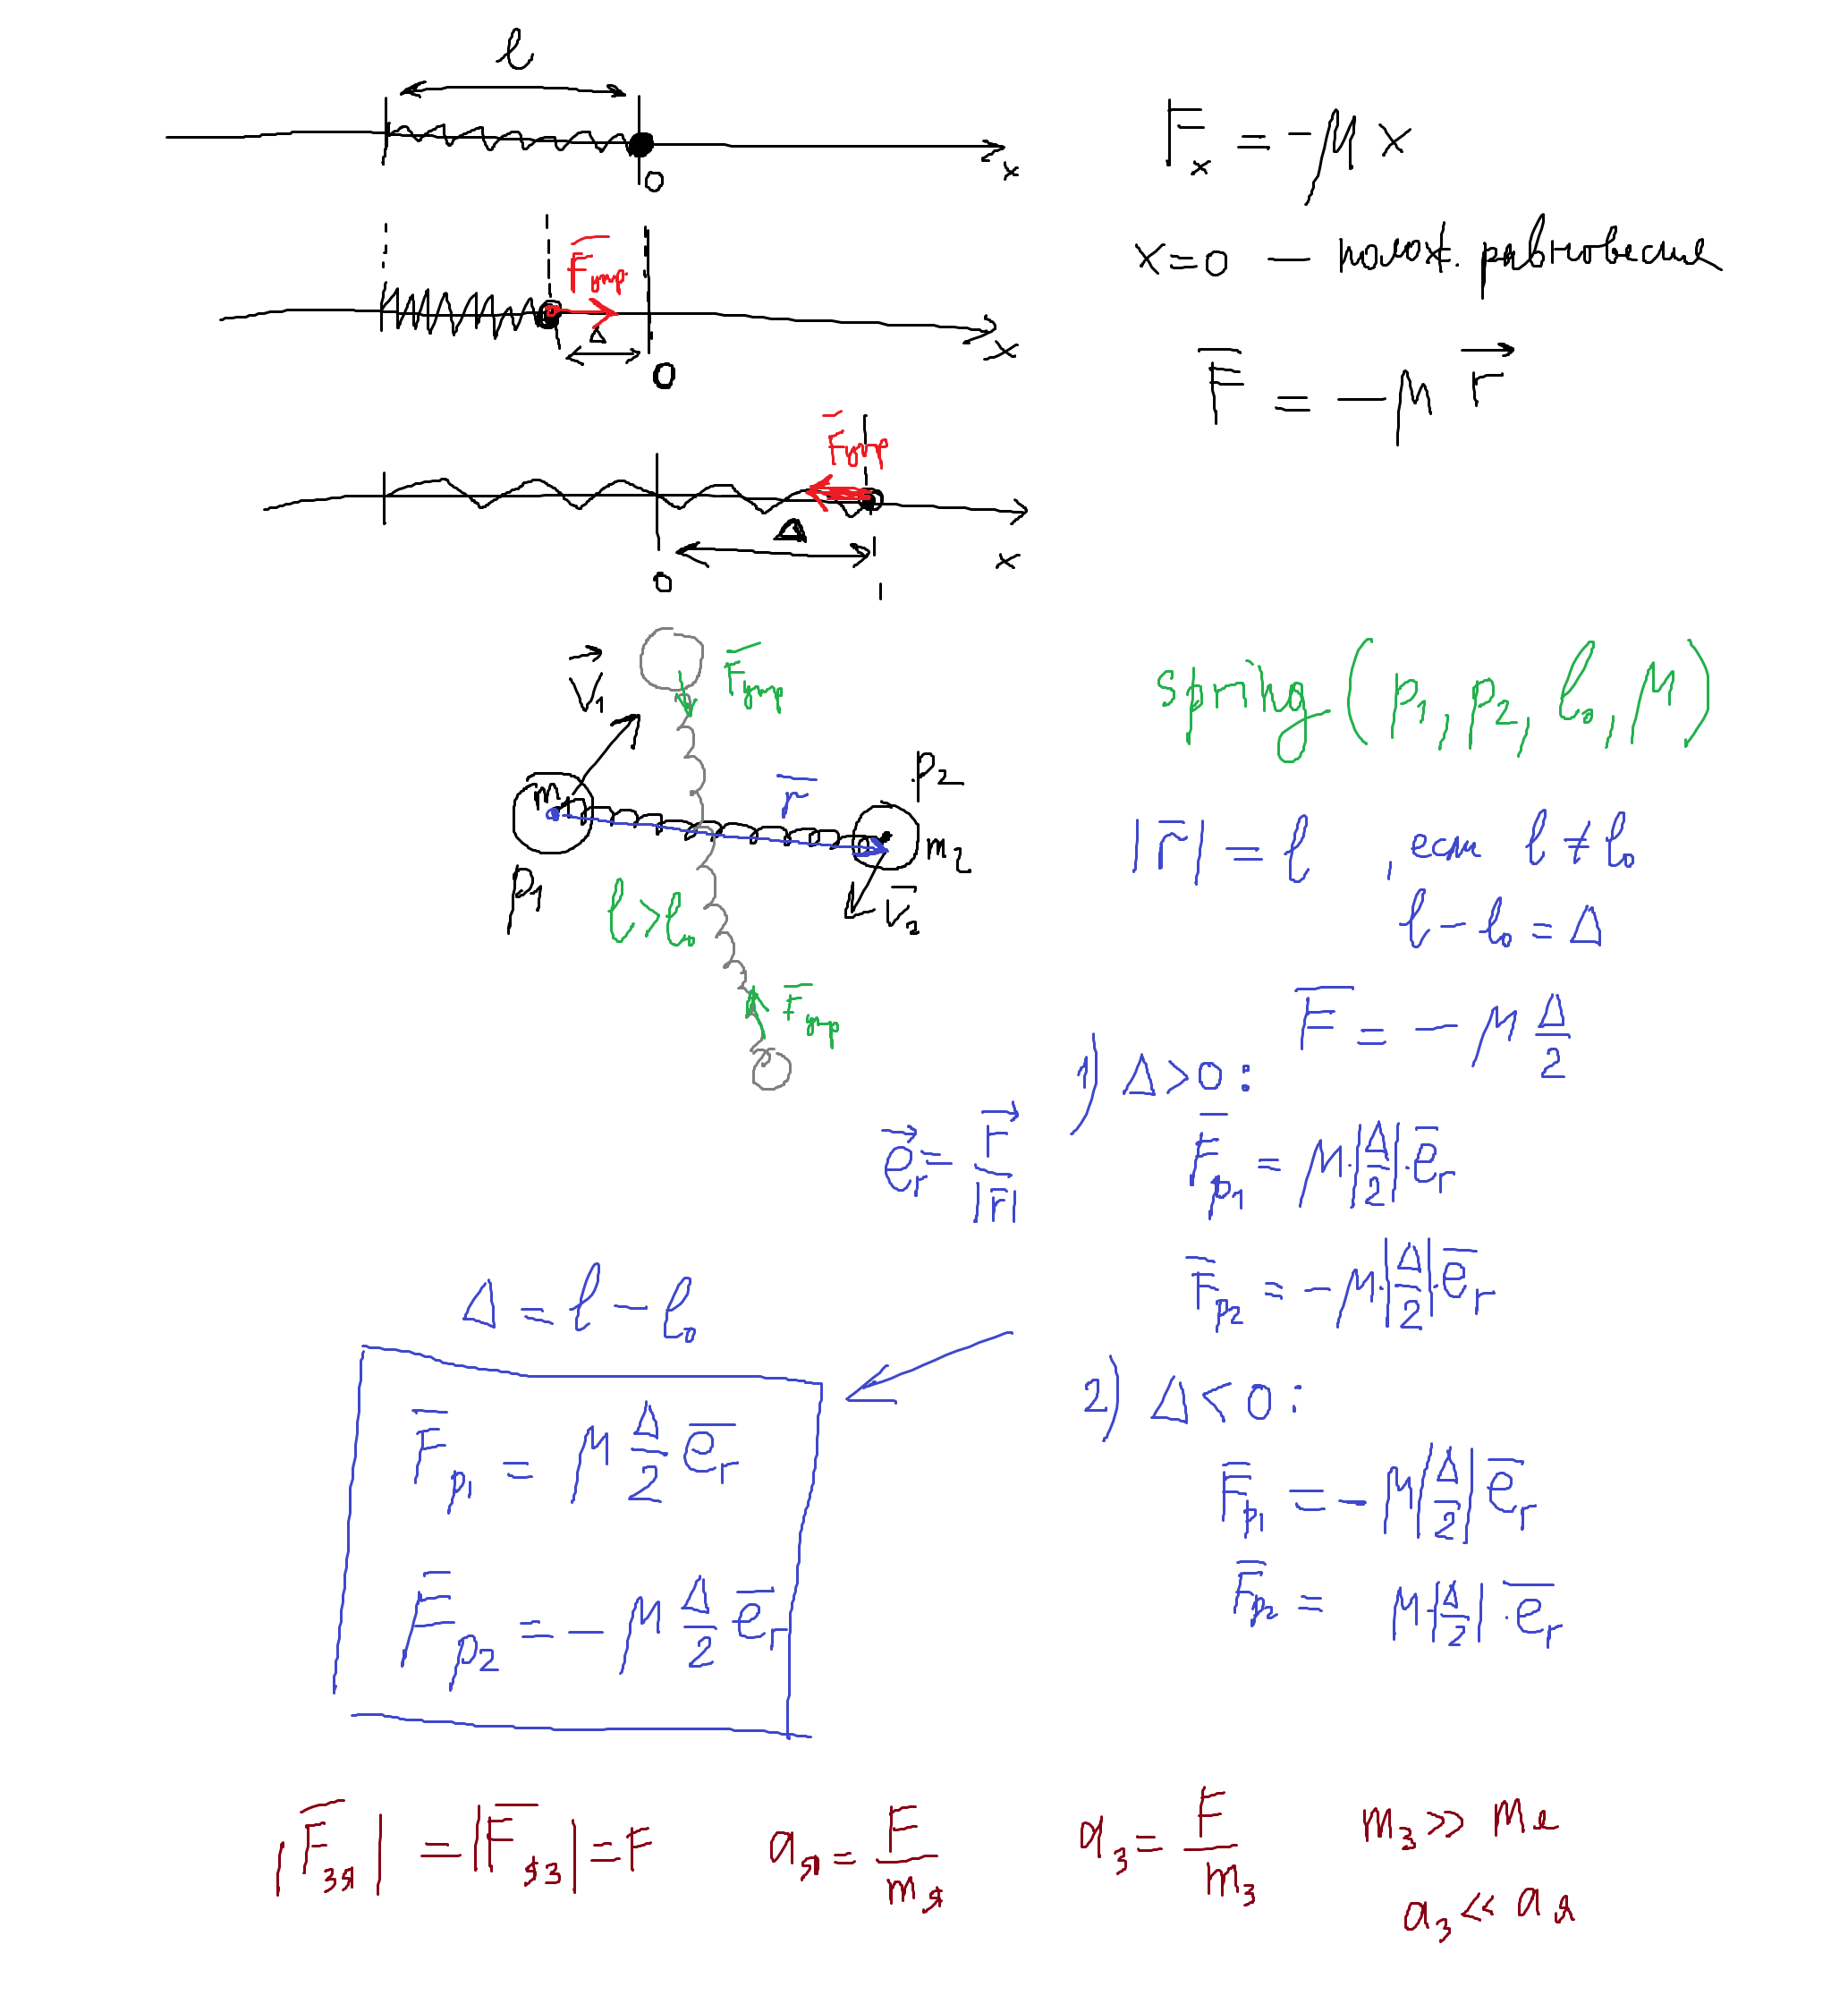

In [3]:
import random
import math

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.force = [0,0]
        
    def move(self):       
        
        self.force[0] += g[0] * self.mass + (-k) * self.velocity[0]
        self.force[1] += g[1] * self.mass + (-k) * self.velocity[1]
        
        self.velocity[0] += 1/self.mass * self.force[0] * dt
        self.velocity[1] += 1/self.mass * self.force[1] * dt
        
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        
        self.force = [0,0]
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
class Spring():
    
    def __init__(self, p1, p2, L, mu):
        self.p1 = p1
        self.p2 = p2
        self.L = L
        self.mu = mu
        
    def affect(self):
        R = [(i-j) for i,j in zip(self.p2.position, self.p1.position)]
        R_abs = math.sqrt(sum([i**2 for i in R]))
        R_unit = [i/R_abs for i in R]
        Delta = R_abs - self.L
        if Delta == 0: return None
        
        self.p1.force = [i + self.mu * Delta/2 * j 
                         for i, j in zip(self.p1.force, R_unit)]
        self.p2.force = [i - self.mu * Delta/2 * j 
                         for i, j in zip(self.p2.force, R_unit)]        
        
    def draw(self):
        pygame.draw.line(screen,(0,0,255),self.p1.position,self.p2.position,5)
        
        
        
def collide(p1, p2):
    R = [(i-j) for i,j in zip(p2.position, p1.position)]
    R_abs = math.sqrt(sum([i**2 for i in R]))
    R_unit = [i/R_abs for i in R]
    Delta = p1.radius + p2.radius - R_abs
    
    if Delta > 0:
        
        v1x = p1.velocity[0]
        v1y = p1.velocity[1]
        v2x = p2.velocity[0]
        v2y = p2.velocity[1]
        m1 = p1.mass
        m2 = p2.mass
        
        n = R_unit
        t = [-n[1],n[0]]       
        
        v1n =  n[0]*v1x + n[1]*v1y
        v1t = -n[1]*v1x + n[0]*v1y
        v2n =  n[0]*v2x + n[1]*v2y
        v2t = -n[1]*v2x + n[0]*v2y        
        
        v1n_ = (2*m2*v2n + (m1 - m2)*v1n) / (m1 + m2)
        v2n_ = (2*m1*v1n + (m2 - m1)*v2n) / (m2 + m1)
        
        p1.velocity[0] = n[0]*v1n_ - n[1]*v1t
        p1.velocity[1] = n[1]*v1n_ + n[0]*v1t
        p2.velocity[0] = n[0]*v2n_ - n[1]*v2t
        p2.velocity[1] = n[1]*v2n_ + n[0]*v2t  
        
        p1.position[0] += -(Delta/2) * R_unit[0]
        p1.position[1] += -(Delta/2) * R_unit[1]
        p2.position[0] +=  (Delta/2) * R_unit[0]
        p2.position[1] +=  (Delta/2) * R_unit[1]
        
        
#######################################################

dt = .05
my_particles = []
my_springs = []
num = 2
g = [0, .1]
k = .1


my_particles.append(Particle(30, 60, [50,240], [5,0]))
my_particles.append(Particle(10, 15, [700,240],[-3,0]))
my_springs.append(Spring(my_particles[0], my_particles[1], 200, .05))

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('связи')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    
    for i in range(num-1):
        for j in range(i+1,num):
            collide(my_particles[i], my_particles[j])  
            
    for i in my_springs:
        i.affect()
        i.draw()
    
    pygame.display.flip()
    
pygame.quit()

### Взаимодействие с объектами при помощи мышки

In [5]:
import random
import math

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.force = [0,0]
        
    def mouseMove(self, position):
        (x,y)=position
        self.velocity = [x - self.position[0], y - self.position[1]]
        
    def move(self):       
        
        self.force[0] += g[0] * self.mass + (-k) * self.velocity[0]
        self.force[1] += g[1] * self.mass + (-k) * self.velocity[1]
        
        self.velocity[0] += 1/self.mass * self.force[0] * dt
        self.velocity[1] += 1/self.mass * self.force[1] * dt
        
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        
        self.force = [0,0]
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
class Spring():
    
    def __init__(self, p1, p2, L, mu):
        self.p1 = p1
        self.p2 = p2
        self.L = L
        self.mu = mu
        
    def affect(self):
        R = [(i-j) for i,j in zip(self.p2.position, self.p1.position)]
        R_abs = math.sqrt(sum([i**2 for i in R]))
        R_unit = [i/R_abs for i in R]
        Delta = R_abs - self.L
        if Delta == 0: return None
        
        self.p1.force = [i + self.mu * Delta/2 * j 
                         for i, j in zip(self.p1.force, R_unit)]
        self.p2.force = [i - self.mu * Delta/2 * j 
                         for i, j in zip(self.p2.force, R_unit)]        
        
    def draw(self):
        pygame.draw.line(screen,(0,0,255),self.p1.position,self.p2.position,5)
        
        
        
def collide(p1, p2):
    R = [(i-j) for i,j in zip(p2.position, p1.position)]
    R_abs = math.sqrt(sum([i**2 for i in R]))
    R_unit = [i/R_abs for i in R]
    Delta = p1.radius + p2.radius - R_abs
    
    if Delta > 0:
        
        v1x = p1.velocity[0]
        v1y = p1.velocity[1]
        v2x = p2.velocity[0]
        v2y = p2.velocity[1]
        m1 = p1.mass
        m2 = p2.mass
        
        n = R_unit
        t = [-n[1],n[0]]       
        
        v1n =  n[0]*v1x + n[1]*v1y
        v1t = -n[1]*v1x + n[0]*v1y
        v2n =  n[0]*v2x + n[1]*v2y
        v2t = -n[1]*v2x + n[0]*v2y        
        
        v1n_ = (2*m2*v2n + (m1 - m2)*v1n) / (m1 + m2)
        v2n_ = (2*m1*v1n + (m2 - m1)*v2n) / (m2 + m1)
        
        p1.velocity[0] = n[0]*v1n_ - n[1]*v1t
        p1.velocity[1] = n[1]*v1n_ + n[0]*v1t
        p2.velocity[0] = n[0]*v2n_ - n[1]*v2t
        p2.velocity[1] = n[1]*v2n_ + n[0]*v2t  
        
        p1.position[0] += -(Delta/2) * R_unit[0]
        p1.position[1] += -(Delta/2) * R_unit[1]
        p2.position[0] +=  (Delta/2) * R_unit[0]
        p2.position[1] +=  (Delta/2) * R_unit[1]
        
def findParticle(position):
    (x,y)=position
    for particle in my_particles:
        if math.hypot(particle.position[0] - x, particle.position[1] - y) <= particle.radius:
            return particle
    return None
        
        
#######################################################

dt = .05
my_particles = []
my_springs = []
num = 2
g = [0, .1]
k = .1


my_particles.append(Particle(30, 60, [50,240], [5,0]))
my_particles.append(Particle(10, 15, [700,240],[-3,0]))
my_springs.append(Spring(my_particles[0], my_particles[1], 200, .05))

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('связи')

selected_particle = None
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            selected_particle = findParticle(pygame.mouse.get_pos())
        elif event.type == pygame.MOUSEBUTTONUP:
            selected_particle = None
            
    if selected_particle:
        selected_particle.mouseMove(pygame.mouse.get_pos())
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    
    for i in range(num-1):
        for j in range(i+1,num):
            collide(my_particles[i], my_particles[j])  
            
    for i in my_springs:
        i.affect()
        i.draw()
    
    pygame.display.flip()
    
pygame.quit()